<a href="https://colab.research.google.com/github/jdiazram/DEEP_GEOM/blob/master/modelos_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

In [1]:
import numpy as np #
import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf # Import TensorFlow 
print(tf.version.VERSION) # Check TensorFlow version
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline 
#hará que las salidas de gráficos aparezcan y se almacenen en el cuaderno

from IPython.display import clear_output #limpiar

2.5.0


# Cargar base de datos

In [2]:
# Carga de base de datos
!wget https://www.dropbox.com/s/imyjti8exyuzczz/dg.zip
!unzip dg.zip
!rm dg.zip

clear_output()
print('Base de datos cargada')

Base de datos cargada


# Preprocesamiento

In [3]:
#carga de datos en variables
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]
#print(train_labels)

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]
#print(validation_labels)
print('Train dataset shape:', train_imgs.shape) 
print('Validation dataset shape:', validation_imgs.shape)
mf_validation = validation_imgs.shape[0]

Train dataset shape: (2561, 150, 150, 3)
Validation dataset shape: (320, 150, 150, 3)


(150, 150, 3)


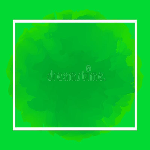

In [4]:
#normalizacion
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[2556].shape)
array_to_img(train_imgs[2556])

In [5]:
#Codificación los LABEL mediante One Hot Encoding
batch_size = 30
num_classes = 7
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
train_labels_enc = to_categorical(train_labels_enc, num_classes)
validation_labels_enc = le.transform(validation_labels)
validation_labels_enc = to_categorical(validation_labels_enc, num_classes)

print(train_labels[455:465]) 
print(train_labels_enc[455:465]) #ejemplo de rango

['triangulo', 'circulo', 'trapecio', 'circulo', 'cuadrado', 'triangulo', 'circulo', 'cuadrado', 'rectangulo', 'elipse']
[[0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [6]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30, shuffle=True)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=30, shuffle=True)
#input_shape = (150, 150, 3)
print(train_generator.n)
print(val_generator.n)

2561
320


# Modelo

In [14]:
#modelos, solo usar 1
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

modelo_1 = [    
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(7, activation='softmax')
]

modelo_2 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(7, activation='softmax')
]

modelo_3 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_4 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(7, activation='softmax')
]

modelo_5 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(7, activation='softmax')
]

modelo_6 = [    
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
]

modelo_7 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')
]

modelo_8 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
]

modelo_9 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
]

In [15]:
model = Sequential(modelo_6)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 12, 12, 128)      

In [16]:
#para calcular el tiempo de entrenamiento
import time
start = time.time() #partiendo

# Entrenamiento

Los steps_per_epoch y epochs para los experimentos variaron de la siguiente forma:
*   steps_per_epoch = 30 | epochs = 30
*   steps_per_epoch = 30 | epochs = 100
*   steps_per_epoch = 86 | epochs = 100

Y según la configuracion anterior, se usó Dropout o no



In [17]:
STEP_SIZE_VAL=val_generator.n//val_generator.batch_size

history = model.fit(train_generator, steps_per_epoch=86, epochs=100, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

Epoch 1/100
86/86 [==============================] - 41s 148ms/step - loss: 1.9487 - accuracy: 0.1868 - val_loss: 1.9198 - val_accuracy: 0.2033
Epoch 2/100
86/86 [==============================] - 13s 153ms/step - loss: 1.9266 - accuracy: 0.1968 - val_loss: 1.9124 - val_accuracy: 0.2033
Epoch 3/100
86/86 [==============================] - 13s 153ms/step - loss: 1.9267 - accuracy: 0.1967 - val_loss: 1.9364 - val_accuracy: 0.1867
Epoch 4/100
86/86 [==============================] - 12s 142ms/step - loss: 1.9143 - accuracy: 0.2039 - val_loss: 1.8896 - val_accuracy: 0.2033
Epoch 5/100
86/86 [==============================] - 12s 142ms/step - loss: 1.9006 - accuracy: 0.2107 - val_loss: 1.8825 - val_accuracy: 0.2200
Epoch 6/100
86/86 [==============================] - 12s 141ms/step - loss: 1.8955 - accuracy: 0.2156 - val_loss: 1.8823 - val_accuracy: 0.2200
Epoch 7/100
86/86 [==============================] - 13s 149ms/step - loss: 1.8913 - accuracy: 0.2345 - val_loss: 1.8874 - val_accuracy:

In [18]:
done = time.time()
elapsed = done - start #terminando
print("Tiempo total de ejecución training/validation", elapsed)

Tiempo total de ejecución training/validation 1391.9668893814087


# Gráfico de entrenamiento

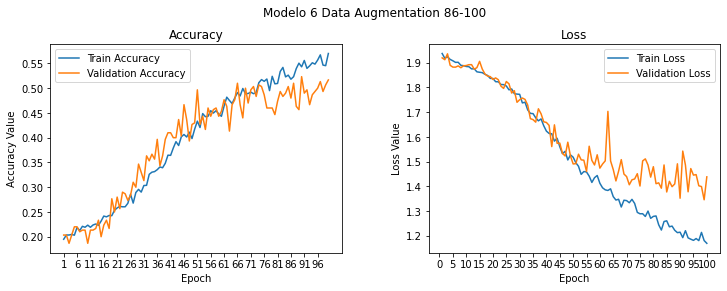

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Modelo 6 Data Augmentation 86-100', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
#se guarda modelo luego del entrenamiento
model.save('modelo6_DA-86-100.h5') #este modelo fue el que mejor resultados entregó

# Carga del modelo entrenado

Este paso se puede utilizar sin la necesidad de entrenar, ya que el modelo entrenado esta disponible, pero si usted quiere volver a entrenar con otro modelo o configuracióón puede hacerlo en los pasos anteriores.

In [20]:
from keras.models import load_model
#descarga del modelo M6
!wget https://www.dropbox.com/s/ue9pujl6wsarbk2/modelo6_DA-86-100.h5
# cargar el modelo
modelo_6_DA = load_model('modelo6_DA-86-100.h5')

clear_output()
print('Modelo cargado')

Modelo cargado


# Preprocesamiento de datos de Test

In [21]:
IMG_DIM = (150, 150)

test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

print('Test dataset shape:', test_imgs.shape)
print(test_labels[100:105])

Test dataset shape: (320, 150, 150, 3)
['cuadrado', 'rectangulo', 'rectangulo', 'trapecio', 'rombo']


In [22]:
test_labels_enc = le.transform(test_labels)
test_labels_enc = to_categorical(test_labels_enc, num_classes)

test_eval = modelo_6_DA.evaluate(test_imgs_scaled, test_labels_enc, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10/10 [==============================] - 1s 7ms/step - loss: 1.1777 - accuracy: 0.5813
Test loss: 1.1776564121246338
Test accuracy: 0.581250011920929


In [24]:
from sklearn import metrics
import numpy as np

# de numero a etiquetas, según prediccion del modelo
predictions = np.argmax(modelo_6_DA.predict(test_imgs_scaled), axis=-1)

test_labels_pred = []

for i in range(320):
    if predictions[i] == 0:
        test_labels_pred.append('circulo')
    elif predictions[i] == 1:
        test_labels_pred.append('cuadrado')
    elif predictions[i] == 2:
        test_labels_pred.append('elipse')
    elif predictions[i] == 3:
        test_labels_pred.append('rectangulo')
    elif predictions[i] == 4:
        test_labels_pred.append('rombo')
    elif predictions[i] == 5:
        test_labels_pred.append('trapecio')
    else:
        test_labels_pred.append('triangulo')

print(test_labels_pred)

['circulo', 'rectangulo', 'circulo', 'trapecio', 'rectangulo', 'cuadrado', 'triangulo', 'triangulo', 'trapecio', 'rectangulo', 'elipse', 'triangulo', 'circulo', 'elipse', 'triangulo', 'circulo', 'rectangulo', 'rombo', 'triangulo', 'trapecio', 'circulo', 'circulo', 'cuadrado', 'rombo', 'circulo', 'elipse', 'rectangulo', 'rombo', 'trapecio', 'trapecio', 'rectangulo', 'rectangulo', 'triangulo', 'circulo', 'rombo', 'rectangulo', 'rombo', 'trapecio', 'triangulo', 'triangulo', 'rectangulo', 'rectangulo', 'circulo', 'triangulo', 'trapecio', 'triangulo', 'circulo', 'circulo', 'circulo', 'elipse', 'rombo', 'triangulo', 'triangulo', 'elipse', 'triangulo', 'triangulo', 'circulo', 'trapecio', 'circulo', 'triangulo', 'triangulo', 'triangulo', 'rombo', 'cuadrado', 'cuadrado', 'cuadrado', 'triangulo', 'triangulo', 'trapecio', 'rectangulo', 'triangulo', 'trapecio', 'cuadrado', 'triangulo', 'circulo', 'elipse', 'rombo', 'trapecio', 'cuadrado', 'elipse', 'circulo', 'circulo', 'trapecio', 'rombo', 'rombo

In [25]:
from sklearn import metrics

# Matriz de confusión
print(metrics.confusion_matrix(test_labels, test_labels_pred))

# Precision and recall, F1-score y support
print(metrics.classification_report(test_labels, test_labels_pred, digits=3))

[[58  1  2  0  4  0  0]
 [ 2  8  3 19  8  1  4]
 [11  0 19  0  2  4  0]
 [ 3  4  1 20  2  7  2]
 [ 1  7  0  1 24  1  8]
 [ 3  5  2  1  3 25  5]
 [ 4  0  4  1  3  5 32]]
              precision    recall  f1-score   support

     circulo      0.707     0.892     0.789        65
    cuadrado      0.320     0.178     0.229        45
      elipse      0.613     0.528     0.567        36
  rectangulo      0.476     0.513     0.494        39
       rombo      0.522     0.571     0.545        42
    trapecio      0.581     0.568     0.575        44
   triangulo      0.627     0.653     0.640        49

    accuracy                          0.581       320
   macro avg      0.550     0.558     0.548       320
weighted avg      0.560     0.581     0.565       320

